# Task 7: Support Vector Machines (SVM)

## Objective
To implement SVM for both linear and non-linear classification.

## Tools Used
- Python
- Scikit-learn
- NumPy
- Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dataset Overview

The Breast Cancer dataset is a binary classification dataset.
Target variable indicates malignant or benign diagnosis.

In [4]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
df["diagnosis"] = df["diagnosis"].map({"M":1, "B":0})

In [6]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Scaling

SVM is sensitive to feature magnitude.
Standardization ensures all features contribute equally.

In [11]:
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

In [12]:
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193
[[68  3]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## Linear SVM Performance

Linear kernel tries to find a straight hyperplane separating classes.

In [13]:
svm_rbf = SVC(kernel="rbf", C=1, gamma="scale")
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

In [14]:
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9824561403508771


## RBF Kernel Performance

RBF kernel handles non-linear decision boundaries using the kernel trick.

In [15]:
svm_tuned = SVC(kernel="rbf", C=10, gamma=0.01)
svm_tuned.fit(X_train, y_train)

print("Tuned SVM Accuracy:", accuracy_score(y_test, svm_tuned.predict(X_test)))

Tuned SVM Accuracy: 0.9824561403508771


## Hyperparameter Tuning

- C controls regularization strength.
- Gamma controls influence of individual points.

Higher C → Less regularization (may overfit).
Higher Gamma → More complex boundary.

In [16]:
cv_scores = cross_val_score(svm_rbf, X, y, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())

Cross Validation Accuracy: 0.6063654712001242


## Cross Validation

Cross-validation provides reliable estimate of model performance.

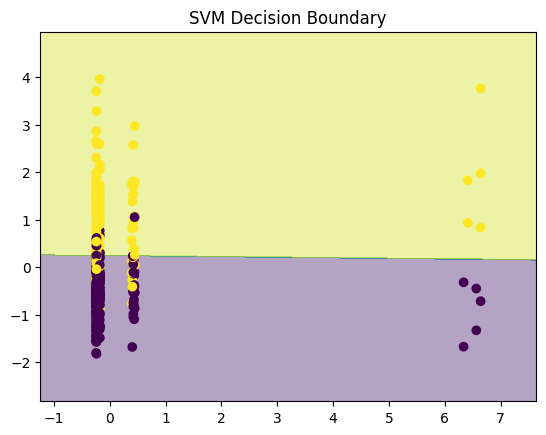

In [17]:
X_vis = X.iloc[:, :2]
y_vis = y

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42
)

scaler_v = StandardScaler()
X_train_v = scaler_v.fit_transform(X_train_v)

model_v = SVC(kernel="linear")
model_v.fit(X_train_v, y_train_v)

# Meshgrid
x_min, x_max = X_train_v[:, 0].min() - 1, X_train_v[:, 0].max() + 1
y_min, y_max = X_train_v[:, 1].min() - 1, X_train_v[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model_v.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_v[:, 0], X_train_v[:, 1], c=y_train_v)
plt.title("SVM Decision Boundary")
plt.show()

## Decision Boundary

SVM finds optimal hyperplane maximizing margin between classes.

## Final Conclusion

- Linear SVM performs well when data is linearly separable.
- RBF kernel handles non-linear patterns.
- C and gamma significantly affect model complexity.
- Cross-validation confirms model reliability.
- SVM is powerful for high-dimensional classification tasks.